# Tree and Graph Algorithms

### Tree  and graph Search

#### Breadth First Search simplified

In [1]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [2]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'D', 'E'},
 'C': {'A', 'F'},
 'D': {'B'},
 'E': {'B', 'F'},
 'F': {'C', 'E'}}

![alt](http://eddmann.com/uploads/depth-first-search-and-breadth-first-search-in-python/graph.png)

In [3]:
def bfs(graph, start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

In [4]:
bfs(graph, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

#### Depth First Search simplified

In [8]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited


In [6]:
dfs(graph, 'A')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [7]:
dfs(graph, 'C')

{'A', 'B', 'C', 'D', 'E', 'F'}

---------

#### Minimal Spanning Tree (Prism's Method)

In [49]:
import sys 

class Graph(): 

    def __init__(self, vertices): 
            self.V = vertices 
            self.graph = [[0 for column in range(vertices)] 
                         for row in range(vertices)] 
            
            
    def printMST(self, parent): 
        print ("Edge \tWeight")
        for i in range(1, self.V): 
            print(parent[i],"-",i,"\t",self.graph[i][parent[i]]) 
            
            
    def minKey(self, key, mstSet):  
            min = sys.maxsize 
            for v in range(self.V): 
                if key[v] < min and mstSet[v] == False: 
                    min = key[v] 
                    min_index = v 
            return min_index 

        
    def primMST(self): 
        key = [sys.maxsize] * self.V 
        parent = [None] * self.V 
        key[0] = 0
        mstSet = [False] * self.V 
        parent[0] = -1 
        for cout in range(self.V): 
            u = self.minKey(key, mstSet) 
            mstSet[u] = True
            for v in range(self.V): 
                if self.graph[u][v] > 0 and \
                    mstSet[v] == False and \
                    key[v] > self.graph[u][v]: 
                        key[v] = self.graph[u][v] 
                        parent[v] = u 
        self.printMST(parent)

In [50]:
g = Graph(5) 
g.graph = [ [0, 2, 0, 6, 0], 
        [2, 0, 3, 8, 5], 
        [0, 3, 0, 0, 7], 
        [6, 8, 0, 0, 9], 
        [0, 5, 7, 9, 0]] 

In [51]:
g.primMST(); 

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


-------

### NetworkX implementation

In [52]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [53]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

#### Traversal

##### Depth First Search

Basic algorithms for depth-first searching the nodes of a graph.

- ```dfs_edges(G[, source, depth_limit])``` 	Iterate over edges in a depth-first-search (DFS).
- ```dfs_tree(G[, source, depth_limit])``` 	Returns oriented tree constructed from a depth-first-search from source.
- ```dfs_predecessors(G[, source, depth_limit])``` 	Returns dictionary of predecessors in depth-first-search from source.
- ```dfs_successors(G[, source, depth_limit])``` 	Returns dictionary of successors in depth-first-search from source.
- ```dfs_preorder_nodes(G[, source, depth_limit])``` 	Generate nodes in a depth-first-search pre-ordering starting at source.
- ```dfs_postorder_nodes(G[, source, depth_limit])``` 	Generate nodes in a depth-first-search post-ordering starting at source.
- ```dfs_labeled_edges(G[, source, depth_limit])``` 	Iterate over edges in a depth-first-search (DFS) labeled by type.

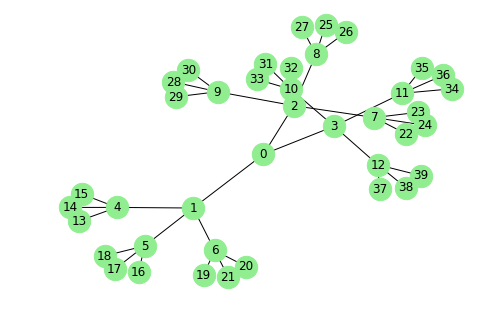

In [66]:
G = nx.balanced_tree(3,3)
nx.draw(G, node_size = 500, node_color = "lightgreen", with_labels = True)

In [67]:
L = list(nx.dfs_edges(G, source=0, depth_limit=5))
print(L)

[(0, 1), (1, 4), (4, 13), (4, 14), (4, 15), (1, 5), (5, 16), (5, 17), (5, 18), (1, 6), (6, 19), (6, 20), (6, 21), (0, 2), (2, 7), (7, 22), (7, 23), (7, 24), (2, 8), (8, 25), (8, 26), (8, 27), (2, 9), (9, 28), (9, 29), (9, 30), (0, 3), (3, 10), (10, 31), (10, 32), (10, 33), (3, 11), (11, 34), (11, 35), (11, 36), (3, 12), (12, 37), (12, 38), (12, 39)]


In [69]:
nx.dfs_predecessors(G, source=0)

{1: 0,
 4: 1,
 13: 4,
 14: 4,
 15: 4,
 5: 1,
 16: 5,
 17: 5,
 18: 5,
 6: 1,
 19: 6,
 20: 6,
 21: 6,
 2: 0,
 7: 2,
 22: 7,
 23: 7,
 24: 7,
 8: 2,
 25: 8,
 26: 8,
 27: 8,
 9: 2,
 28: 9,
 29: 9,
 30: 9,
 3: 0,
 10: 3,
 31: 10,
 32: 10,
 33: 10,
 11: 3,
 34: 11,
 35: 11,
 36: 11,
 12: 3,
 37: 12,
 38: 12,
 39: 12}

In [70]:
nx.dfs_successors(G, source=0)

{0: [1, 2, 3],
 1: [4, 5, 6],
 4: [13, 14, 15],
 5: [16, 17, 18],
 6: [19, 20, 21],
 2: [7, 8, 9],
 7: [22, 23, 24],
 8: [25, 26, 27],
 9: [28, 29, 30],
 3: [10, 11, 12],
 10: [31, 32, 33],
 11: [34, 35, 36],
 12: [37, 38, 39]}

In [71]:
list(nx.dfs_preorder_nodes(G))

[0,
 1,
 4,
 13,
 14,
 15,
 5,
 16,
 17,
 18,
 6,
 19,
 20,
 21,
 2,
 7,
 22,
 23,
 24,
 8,
 25,
 26,
 27,
 9,
 28,
 29,
 30,
 3,
 10,
 31,
 32,
 33,
 11,
 34,
 35,
 36,
 12,
 37,
 38,
 39]

In [72]:
list(nx.dfs_postorder_nodes(G))

[13,
 14,
 15,
 4,
 16,
 17,
 18,
 5,
 19,
 20,
 21,
 6,
 1,
 22,
 23,
 24,
 7,
 25,
 26,
 27,
 8,
 28,
 29,
 30,
 9,
 2,
 31,
 32,
 33,
 10,
 34,
 35,
 36,
 11,
 37,
 38,
 39,
 12,
 3,
 0]

In [73]:
list(nx.dfs_labeled_edges(G))

[(0, 0, 'forward'),
 (0, 1, 'forward'),
 (1, 0, 'nontree'),
 (1, 4, 'forward'),
 (4, 1, 'nontree'),
 (4, 13, 'forward'),
 (13, 4, 'nontree'),
 (4, 13, 'reverse'),
 (4, 14, 'forward'),
 (14, 4, 'nontree'),
 (4, 14, 'reverse'),
 (4, 15, 'forward'),
 (15, 4, 'nontree'),
 (4, 15, 'reverse'),
 (1, 4, 'reverse'),
 (1, 5, 'forward'),
 (5, 1, 'nontree'),
 (5, 16, 'forward'),
 (16, 5, 'nontree'),
 (5, 16, 'reverse'),
 (5, 17, 'forward'),
 (17, 5, 'nontree'),
 (5, 17, 'reverse'),
 (5, 18, 'forward'),
 (18, 5, 'nontree'),
 (5, 18, 'reverse'),
 (1, 5, 'reverse'),
 (1, 6, 'forward'),
 (6, 1, 'nontree'),
 (6, 19, 'forward'),
 (19, 6, 'nontree'),
 (6, 19, 'reverse'),
 (6, 20, 'forward'),
 (20, 6, 'nontree'),
 (6, 20, 'reverse'),
 (6, 21, 'forward'),
 (21, 6, 'nontree'),
 (6, 21, 'reverse'),
 (1, 6, 'reverse'),
 (0, 1, 'reverse'),
 (0, 2, 'forward'),
 (2, 0, 'nontree'),
 (2, 7, 'forward'),
 (7, 2, 'nontree'),
 (7, 22, 'forward'),
 (22, 7, 'nontree'),
 (7, 22, 'reverse'),
 (7, 23, 'forward'),
 (23, 7, 

#### 3.2 Breadth-first search

Basic algorithms for breadth-first searching the nodes of a graph.

- ```bfs_edges(G, source[, reverse, depth_limit])``` 	Iterate over edges in a breadth-first-search starting at source.
- ```bfs_tree(G, source[, reverse, depth_limit])``` 	Returns an oriented tree constructed from of a breadth-first-search starting at source.
- ```bfs_predecessors(G, source[, depth_limit])``` 	Returns an iterator of predecessors in breadth-first-search from source.
- ```bfs_successors(G, source[, depth_limit])``` 	Returns an iterator of successors in breadth-first-search from so

In [74]:
print(list(nx.bfs_edges(G,0)))

[(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 8), (2, 9), (3, 10), (3, 11), (3, 12), (4, 13), (4, 14), (4, 15), (5, 16), (5, 17), (5, 18), (6, 19), (6, 20), (6, 21), (7, 22), (7, 23), (7, 24), (8, 25), (8, 26), (8, 27), (9, 28), (9, 29), (9, 30), (10, 31), (10, 32), (10, 33), (11, 34), (11, 35), (11, 36), (12, 37), (12, 38), (12, 39)]


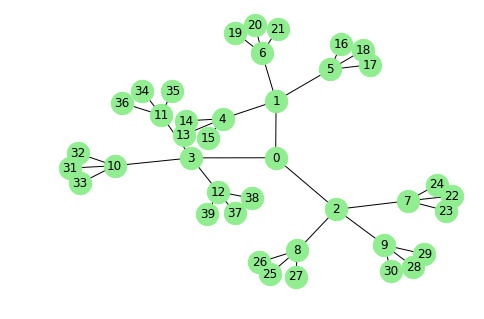

In [78]:
nx.draw(G, node_size = 500, node_color = "lightgreen", with_labels = True)

In [76]:
print(list(nx.bfs_predecessors(G,0)))

[(1, 0), (2, 0), (3, 0), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2), (10, 3), (11, 3), (12, 3), (13, 4), (14, 4), (15, 4), (16, 5), (17, 5), (18, 5), (19, 6), (20, 6), (21, 6), (22, 7), (23, 7), (24, 7), (25, 8), (26, 8), (27, 8), (28, 9), (29, 9), (30, 9), (31, 10), (32, 10), (33, 10), (34, 11), (35, 11), (36, 11), (37, 12), (38, 12), (39, 12)]


In [77]:
print(list(nx.bfs_successors(G,0)))

[(0, [1, 2, 3]), (1, [4, 5, 6]), (2, [7, 8, 9]), (3, [10, 11, 12]), (4, [13, 14, 15]), (5, [16, 17, 18]), (6, [19, 20, 21]), (7, [22, 23, 24]), (8, [25, 26, 27]), (9, [28, 29, 30]), (10, [31, 32, 33]), (11, [34, 35, 36]), (12, [37, 38, 39])]


--------

### References:
1. Latest Algorithm Collection GitHub:https://github.com/TheAlgorithms/Python
2. AI search GitHub book:https://github.com/aimacode
3. Algorithm Online Book: https://algs4.cs.princeton.edu/home/
4. NetworkX documents: https://networkx.github.io/documentation/latest/index.html
5. Network Science Online Book: http://networksciencebook.com/